# Relax Take Home Challenge

Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [94]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Load data
user_engagement = pd.read_csv("takehome_user_engagement.csv", parse_dates=True)
users = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [3]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [5]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
user_engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [10]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
#Create creation timestamp column
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [12]:
#Impute account creation date for null values in last_session_creation_time
users['last_session_creation_time'].fillna(users['creation_time'], inplace=True)

In [13]:
#Create duration of activity in days
users['duration'] = users['last_session_creation_time'] - users['creation_time']
users['duration'] = users['duration'].dt.days

In [14]:
#Create account age based on latest creation time
latest = max(users['creation_time'])
users['account_age'] = latest - users['creation_time']
users['account_age'] = users['account_age'].dt.days

In [15]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,account_age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,38
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136,196
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,437
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1,374
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,498


In [16]:
users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,account_age
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145,43.543083,317.942917
std,3464.24595,0.432742,0.356432,124.056723,3383.761968,126.352426,216.641423
min,1.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000,0.000000,122.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000,0.000000,298.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000,3.000000,500.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,729.000000,729.000000


In [17]:
#Ensure the 'time_stamp' column is of datetime type
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

#Sort the DataFrame by 'user_id' and 'time_stamp' for later calculations
user_engagement = user_engagement.sort_values(by=['user_id', 'time_stamp'])

#Define a function to check if a user is adopted
def is_adopted(user_group):
    user_group['visited'] = 1
    adopted = False
    for i in range(len(user_group) - 2):  # Iterate through the user's logins
        if (user_group.iloc[i + 2]['time_stamp'] - user_group.iloc[i]['time_stamp']).days <= 7:
            adopted = True
            break
    return adopted

#Apply the function to the DataFrame and filter for adopted users
adopted_user_ids = user_engagement.groupby('user_id').filter(is_adopted)['user_id'].unique()

#Merge 'adopted_user_ids' with the 'users' DataFrame based on the 'object_id' and 'user_id' columns
users['adopted_user'] = users['object_id'].isin(adopted_user_ids)

#Convert 'adopted_user' column to onehot vector
users['adopted_user'] = users['object_id'].isin(adopted_user_ids).astype(int)

In [18]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,account_age,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,38,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136,196,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,437,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1,374,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,498,0


In [81]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0).apply(lambda x: 1 if x != 0 else x).astype(int)

In [82]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,account_age,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,1,0,38,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,136,196,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1,0,437,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,1,1,374,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,1,5,498,0


## EDA

Text(0.5, 1.0, 'Source of Creation vs Adoption Status')

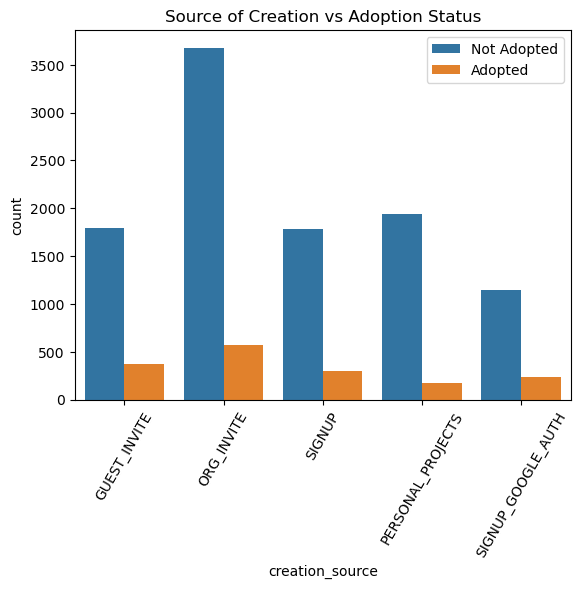

In [41]:
sns.countplot(x='creation_source', data=users, hue='adopted_user')
plt.xticks(rotation=60)
plt.legend(['Not Adopted', 'Adopted'])
plt.title('Source of Creation vs Adoption Status')

In [48]:
#Chi-square test for independence
crosstab = pd.crosstab(users['creation_source'], users['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 91.04842041636412	p = 7.884346873316259e-19


**Insight:** Due to the chi-square test for indpendence results we are able to reject the null hypothesis that there is no relationship between the creation source and adopted user status in favor of a relationship or association. 

In [50]:
users.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.170596
ORG_INVITE            0.134932
PERSONAL_PROJECTS     0.081478
SIGNUP                0.144705
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_user, dtype: float64

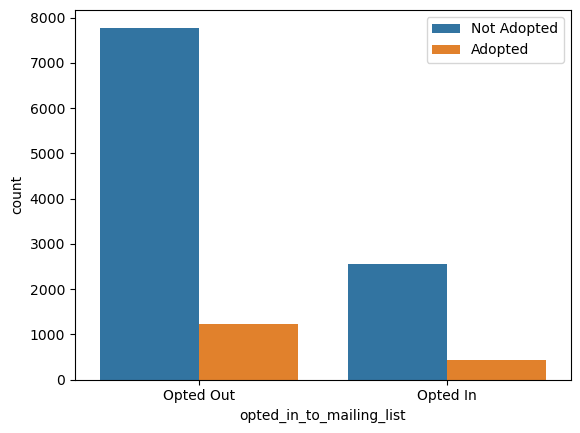

In [52]:
sns.countplot(data=users, x='opted_in_to_mailing_list', hue='adopted_user')
plt.xticks(ticks=[0, 1], labels=['Opted Out', 'Opted In'])
plt.legend(['Not Adopted', 'Adopted'])
plt.show()

In [53]:
#Chi-square test for independence
crosstab = pd.crosstab(users['opted_in_to_mailing_list'], users['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 0.8789863657841395	p = 0.34847945597884034


**Insight:** The chi-square test for indpendence results prove that the null hypothesis is true and there is no relationship between the mailing list status and adopted user status.

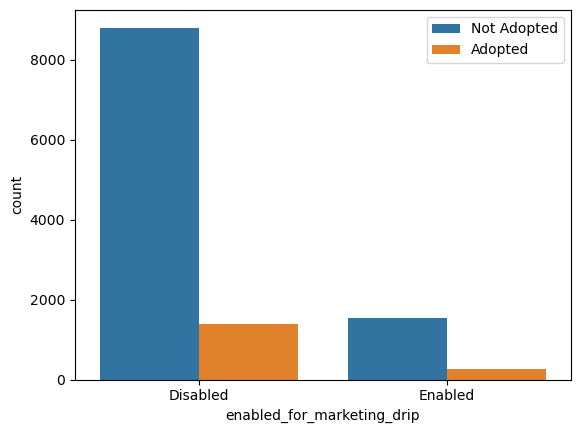

In [54]:
sns.countplot(data=users, x='enabled_for_marketing_drip', hue='adopted_user')
plt.xticks(ticks=[0, 1], labels=['Disabled', 'Enabled'])
plt.legend(['Not Adopted', 'Adopted'])
plt.show()

In [55]:
#Chi-square test for independence
crosstab = pd.crosstab(users['enabled_for_marketing_drip'], users['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 0.46716408473039095	p = 0.49429472330968593


**Insight:** The chi-square test for indpendence results prove that the null hypothesis is true and there is no relationship between the marketing drip status and adopted user status.

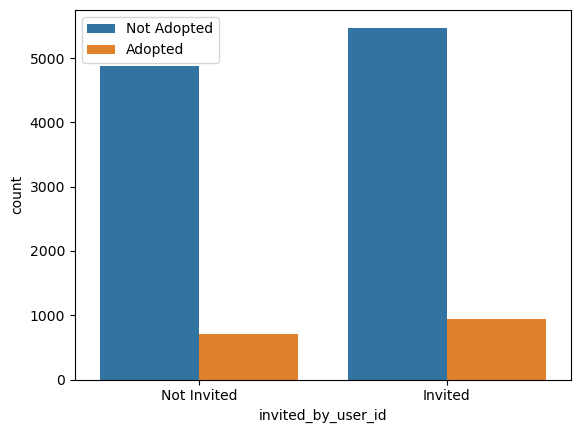

In [85]:
sns.countplot(data=users, x='invited_by_user_id', hue='adopted_user')
plt.xticks(ticks=[0, 1], labels=['Not Invited', 'Invited'])
plt.legend(['Not Adopted', 'Adopted'])
plt.show()

In [84]:
#Chi-square test for independence
crosstab = pd.crosstab(users['invited_by_user_id'], users['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 9.133635762005955	p = 0.0025095251588626395


**Insight:** Due to the chi-square test for indpendence results we are able to reject the null hypothesis that there is no relationship between invitation status and adopted user status in favor of a relationship or association.

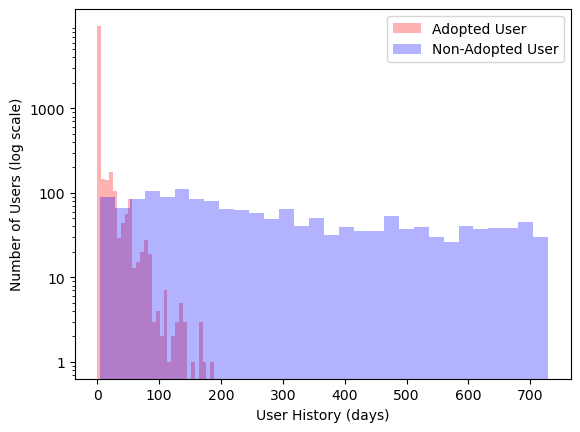

In [61]:
def plot_hist_days(df, col, xlabel):
    # Define colors and labels for adopted and non-adopted users
    colors = ['r', 'b']
    labels = ['Adopted User', 'Non-Adopted User']

    # Create subplots for better organization
    fig, ax = plt.subplots()

    for i, (color, label) in enumerate(zip(colors, labels)):
        # Filter data for adopted and non-adopted users
        data = df.loc[df['adopted_user'] == i, col]

        # Plot the histogram
        ax.hist(data, bins=30, alpha=0.3, color=color, label=label)

    # Use a log scale for the y-axis
    ax.set_yscale('log')

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Number of Users (log scale)')
    ax.set_yticks([1, 10, 100, 1000])
    ax.set_yticklabels(['1', '10', '100', '1000'])
    ax.legend()

    # Show the plot
    plt.show()

# Call the function to plot the histogram
plot_hist_days(users, 'duration', 'User History (days)')

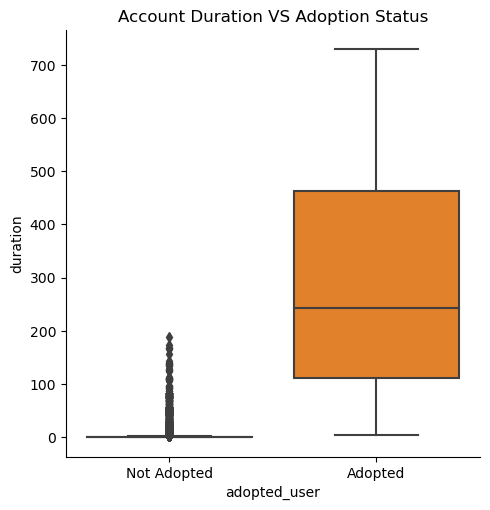

In [44]:
sns.catplot(data=users, x='adopted_user', y='duration', kind='box')
plt.xticks(ticks=[0, 1], labels=['Not Adopted', 'Adopted'])
plt.title('Account Duration VS Adoption Status')
plt.show()

In [36]:
t, p = st.ttest_ind(users['adopted_user'], users['duration'])
print(f'Duration: t={round(t,2)}, p-value={p}')

Duration: t=-37.63, p-value=3.702317297261454e-301


**Insight:** Due to the t-test for indpendence results we are able to reject the null hypothesis that there is no relationship between the duration of the account and adopted user status in favor of a relationship or association. 

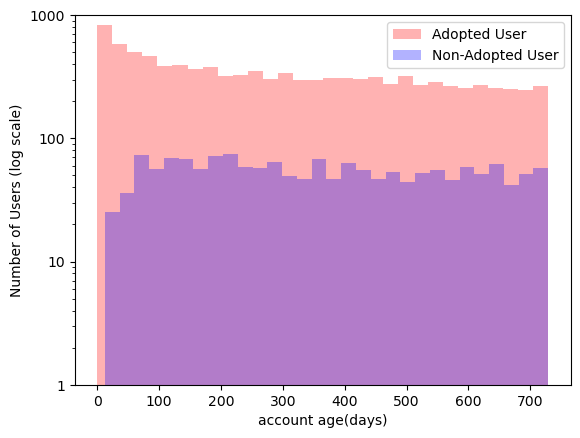

In [63]:
plot_hist_days(users, 'account_age', 'account age(days)')

<AxesSubplot:xlabel='account_age', ylabel='Count'>

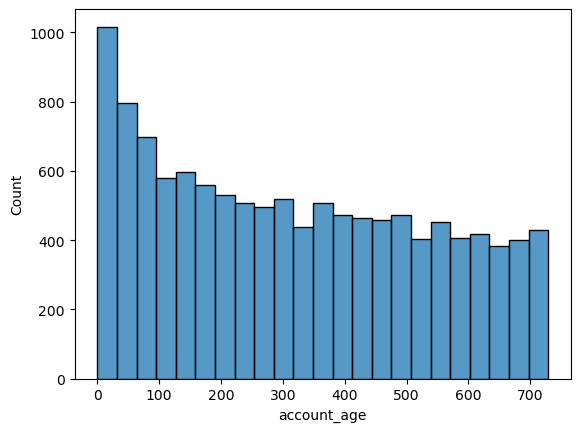

In [66]:
sns.histplot(data=users, x='account_age', bins='auto')

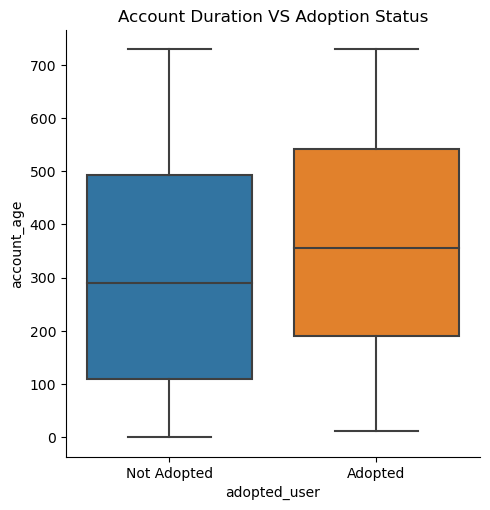

In [67]:
sns.catplot(data=users, x='adopted_user', y='account_age', kind='box')
plt.xticks(ticks=[0, 1], labels=['Not Adopted', 'Adopted'])
plt.title('Account Duration VS Adoption Status')
plt.show()

In [68]:
t, p = st.ttest_ind(users['adopted_user'], users['account_age'])
print(f'Duration: t={round(t,2)}, p-value={p}')

Duration: t=-160.7, p-value=0.0


**Insight:** Due to the t-test for indpendence results we are able to reject the null hypothesis that there is no relationship between the duration of the account and adopted user status in favor of a relationship or association. 

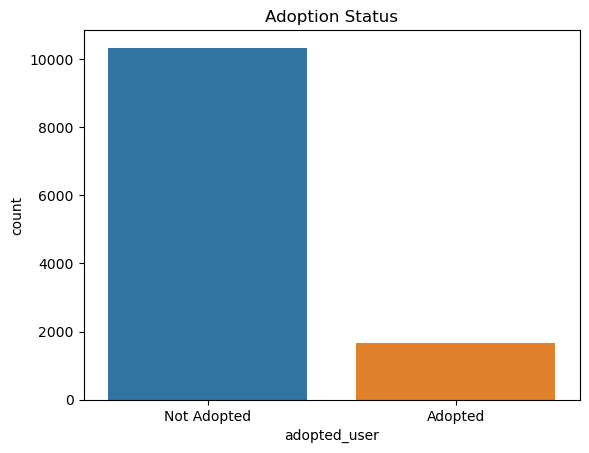

In [72]:
sns.countplot(data=users, x='adopted_user')
plt.xticks(ticks=[0, 1], labels=['Not Adopted', 'Adopted'])
plt.title('Adoption Status')
plt.show()

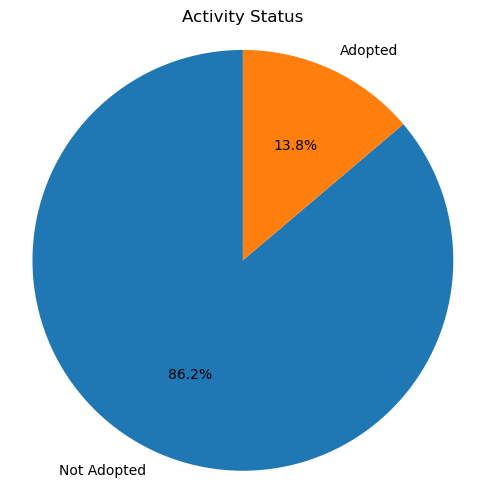

In [75]:
#Count the number of active and inactive users
activity_counts = users['adopted_user'].value_counts()

#Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(activity_counts, labels=['Not Adopted', 'Adopted'], autopct='%1.1f%%', startangle=90)
plt.title('Activity Status')
plt.axis('equal') 

plt.show()

**Insight:** Class percentage between Adopted and Not Adopted users is imbalanced and the data will need to resampled when training the model. 

## Preprocessing

In [87]:
df = users.drop(columns = ['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time'])

In [88]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,account_age,adopted_user
0,GUEST_INVITE,1,0,11,1,0,38,0
1,ORG_INVITE,0,0,1,1,136,196,1
2,ORG_INVITE,0,0,94,1,0,437,0
3,GUEST_INVITE,0,0,1,1,1,374,0
4,GUEST_INVITE,0,0,193,1,5,498,0


In [89]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

display(X_train.head())
display(y_train.head())

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,account_age
10439,ORG_INVITE,0,0,324,1,0,599
3450,ORG_INVITE,1,0,305,1,417,414
4591,SIGNUP,0,0,175,0,5,120
7352,SIGNUP,0,0,318,0,1,429
205,PERSONAL_PROJECTS,0,1,13,0,0,178


10439    0
3450     1
4591     0
7352     0
205      0
Name: adopted_user, dtype: int64

In [90]:
#Initialize RandomOverSampler
ros = RandomUnderSampler(random_state=0)

#Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [96]:
#Numerical features
numeric_features = ['duration', 'account_age']

#Categorical features
categorical_features = [
    'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'
]

#Transformers and pipelines
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Set handle_unknown to 'ignore'
])

#Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#Final pipeline with the classifier
pipeline = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

#Grid search parameters
params = {
    'rf__n_estimators': [10, 25, 50, 75, 100],
    'rf__max_depth': [5, 10, 15, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

#GridSearchCV object
cv = GridSearchCV(pipeline, param_grid=params, cv=5)

cv.fit(X_resampled, y_resampled)

print("Best Estimator:")
print(cv.best_estimator_)
print("\nBest Parameters:")
print(cv.best_params_)


Best Estimator:
Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'account_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['creation_source',
                                                   'opted_in_to_mailing_list',
                                                   'enabled_for_marketing_drip',
                                                   'org_id',
                                                   'invited_by_user_id'])])),
                ('rf',
                 Rand

In [97]:
print(f'Best parameters: {cv.best_params_}')
print(f'Training accuracy score from tuned model: \
       {cv.best_score_*100:.1f}%')

Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 25}
Training accuracy score from tuned model:        95.0%


In [103]:
from sklearn import metrics

y_pred = cv.predict(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
[[6961  265]
 [  73 1101]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      7226
           1       0.81      0.94      0.87      1174

    accuracy                           0.96      8400
   macro avg       0.90      0.95      0.92      8400
weighted avg       0.96      0.96      0.96      8400



**Insight:** The random forest model exhibits strong overall performance, with high accuracy, precision, recall, and f1-scores. With a macro avg f1-score of 0.92 and a weighted avg of 0.96 the model generalizes well, while effectively distinguishes between adopted and not adopted classes, making it a valuable tool for this classification task.

In [102]:
pipeline.fit(X_resampled, y_resampled)

weights = pipeline.named_steps['rf'].feature_importances_

In [101]:
#Replicating pipeline numeric_transformer
num_cols = df[numeric_features].columns
num_cols = num_cols.tolist()

#Replicating pipeline categorical_transformer
cat_cols = pd.get_dummies(df[categorical_features]).columns
cat_cols = cat_cols.tolist()

#Adding column names
cols = num_cols + cat_cols

#Zipping column names to weights list
feature_importance = zip(cols, weights)
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

for i, j in feature_importance:
    print(f'Weight: {j:.3f} | Feature: {i}')

Weight: 0.685 | Feature: duration
Weight: 0.063 | Feature: account_age
Weight: 0.005 | Feature: creation_source_GUEST_INVITE
Weight: 0.004 | Feature: org_id
Weight: 0.004 | Feature: creation_source_PERSONAL_PROJECTS
Weight: 0.004 | Feature: creation_source_SIGNUP
Weight: 0.004 | Feature: creation_source_ORG_INVITE
Weight: 0.004 | Feature: creation_source_SIGNUP_GOOGLE_AUTH
Weight: 0.004 | Feature: enabled_for_marketing_drip
Weight: 0.004 | Feature: opted_in_to_mailing_list
Weight: 0.003 | Feature: invited_by_user_id


**Key Findings:**

1. **Feature Importance:**
   - The most influential features for predicting user adoption are "duration" and "account_age." These two factors significantly impact user behavior and adoption.


2. **Chi-Square Tests:**
   - A relationship was found between user adoption and "creation_source" and "invited_by_user_id." These variables are associated with user adoption and should be considered in predictive models.
   - However, "opted_in_to_mailing_list" and "enabled_for_marketing_drip" were found to be independent of user adoption, suggesting that these factors may not play a significant role in predicting user adoption.


3. **T-Test:**
   - The t-test results revealed that "duration" and "account_age" significantly differ between users who adopt and those who do not. Longer user engagement ("duration") and older account age ("account_age") are associated with higher chances of adoption.

**Summary:**

To predict future user adoption, the following factors should be considered as strong predictors:

1. **Duration:** Users who engage with the platform for a longer duration are more likely to adopt the platform's features or services. Therefore, efforts to increase user engagement may lead to higher adoption rates.

2. **Account Age:** Users with older accounts are more likely to adopt. It's essential to retain long-term users and focus on strategies to keep them engaged.

3. **Creation Source and Invitations:** The method by which users joined the platform ("creation_source") and whether a user invited them ("invited_by_user_id") also influence adoption. These factors should be part of predictive models, as they provide valuable insights into user behavior.

4. **Opted-in to Mailing List and Enabled for Marketing Drip:** These factors were found to be independent of user adoption. While they may still be valuable for other marketing or communication strategies, they are not strong predictors of user adoption.

**Further Research:**

To gain a deeper understanding and improve predictive models for user adoption, consider the following:

1. **Interaction Effects:** Explore potential interaction effects between variables. For example, does the impact of "duration" on adoption vary based on the "creation_source"?

2. **User Engagement Analysis:** Conduct further analysis to understand what specific user behaviors or actions during their "duration" contribute most to adoption.

3. **User Surveys:** Collect user feedback through surveys to gain qualitative insights into why certain users may login on three seperate days in a seven day period and others do not.

4. **A/B Testing:** Implement controlled experiments (A/B tests) to evaluate the impact of specific interventions on users to encourage repeated logins, such as changes in user notifications or communication strategies.

5. **Additional Data:** Consider collecting additional data, such as user demographics or behavior within the platform, to enhance predictive accuracy.

In conclusion, understanding and predicting user adoption is crucial for the platform's growth. By leveraging the identified factors and conducting further research, we have the potential to develop more accurate models and strategies to increase user adoption and engagement.